In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# BFGS (Broyden-Fletcher-Goldfarb-Shanno) is a Quasi-Newton optimization method.
# It updates an approximation of the inverse Hessian matrix instead of computing it directly,
# making it more efficient for high-dimensional problems.
# The algorithm uses the following steps:
# 1. Start with an initial guess for the variable(s) to optimize.
# 2. Initialize the inverse Hessian approximation as the identity matrix.
# 3. Compute the descent direction using the inverse Hessian approximation and the gradient.
# 4. Perform a line search to find a suitable step size.
# 5. Update the position, compute the new gradient, and update the inverse Hessian approximation
#    using the BFGS update rule.
# 6. Repeat until convergence based on the gradient norm.

class BFGS:
    def __init__(self, epsilon=1e-6, beta = 0.05):
        self.epsilon = epsilon
        self.beta = beta
        self.x_history = []
        self.cost_history = []

    def cost_function(self, x):
        # Rosenbrock's valley: f(x, y) = (a - x)^2 + b * (y - x^2)^2
        a = 1
        b = 100
        return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

    def gradient(self, x):
         # Gradient of the Rosenbrock function:
        # df/dx = -2(a - x) - 4b * x * (y - x^2)
        # df/dy = 2b * (y - x^2)
        a = 1
        b = 100
        grad = np.zeros_like(x)
        grad[0] = -2 * (a - x[0]) - 4 * b * x[0] * (x[1] - x[0]**2)
        grad[1] = 2 * b * (x[1] - x[0]**2)
        return grad

    def line_search(self, x, p, grad, beta):
        # backtracking line search based on the Armijo rule
        alpha = 1.0
        c = 1e-4
        while self.cost_function(x + alpha * p) > self.cost_function(x) + c * alpha * np.dot(grad, p):
            alpha *= beta
        return alpha

    def fit(self, initial_x):
        x = initial_x
        n = len(x) if hasattr(x, "__len__") else 1
        H = np.eye(n)  # Initialize the inverse Hessian approximation as the identity matrix
        grad = self.gradient(x)

        while np.linalg.norm(grad) > self.epsilon:
            grad = self.gradient(x)
            self.x_history.append(x)
            cost = self.cost_function(x)
            self.cost_history.append(cost)

            # Compute the descent direction
            p = -np.dot(H, grad)

            # Perform line search to find step size
            alpha = self.line_search(x, p, grad, self.beta)

            # Update position
            x_new = x + alpha * p
            grad_new = self.gradient(x_new)

            # Compute differences
            delta_x = x_new - x
            delta_grad = grad_new - grad

            # BFGS update rule
            rho = 1.0 / np.dot(delta_grad, delta_x)
            if rho <= 0:  # Avoid division by zero or negative values
                rho = 1e-10

            I = np.eye(n)
            #using formula: 𝐻(𝑘+1) = (𝐼 − 𝜌 * 𝛿 * 𝑦') * 𝐻(𝑘) (𝐼 − 𝜌 * 𝑦 * 𝛿') + (𝜌 * 𝛿 * 𝛿')
            H = (I - rho * np.outer(delta_x, delta_grad)).dot(H).dot(I - rho * np.outer(delta_grad, delta_x)) + rho * np.outer(delta_x, delta_x)

            x = x_new
            grad = grad_new

        return x

Optimized x: [0.99999998 0.99999995]


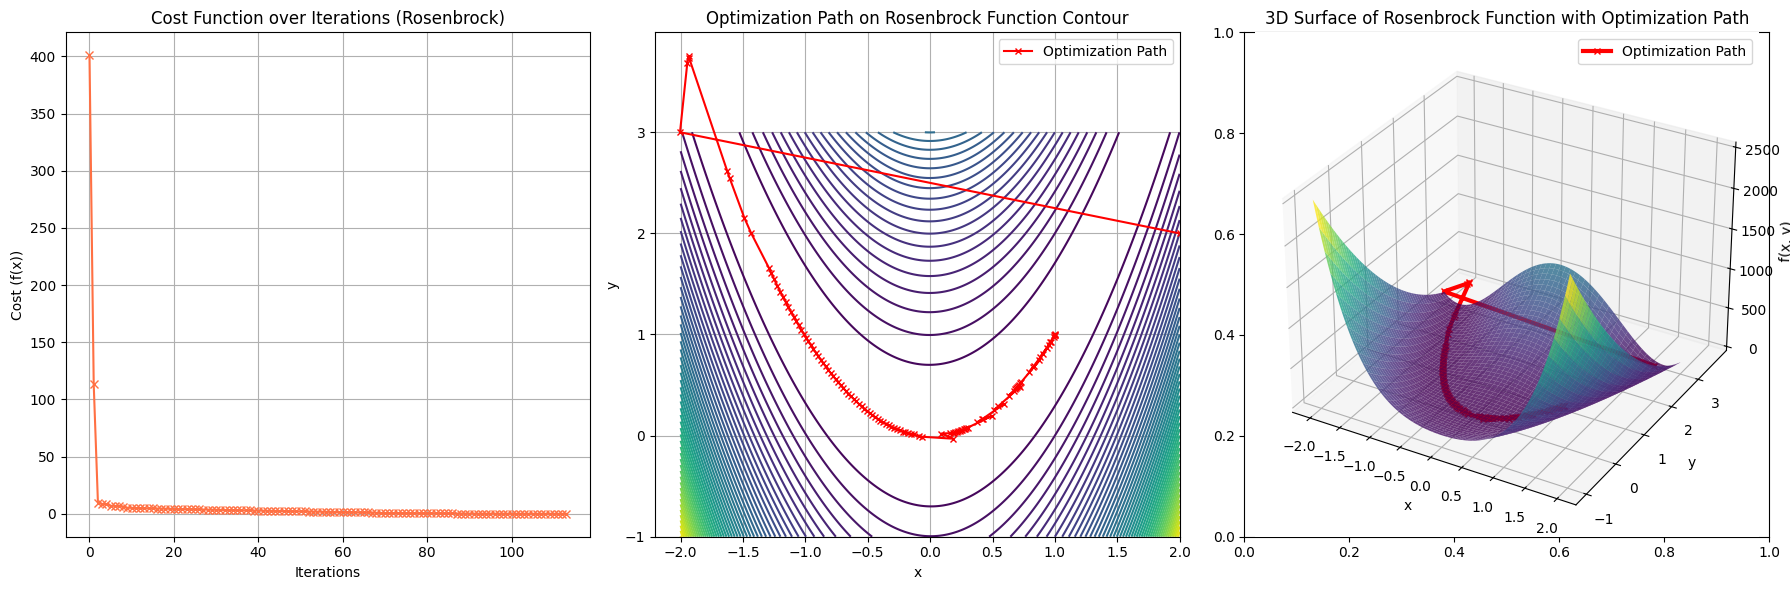

In [ ]:
if __name__ == "__main__":
    bfgs = BFGS(epsilon=1e-6)

    initial_x = np.array([2.0, 2.0])
    optimized_x = bfgs.fit(initial_x)

    print("Optimized x:", optimized_x)

    # Define x_vals and y_vals for the contour and 3D plots
    x_vals = np.linspace(-2, 2, 400)
    y_vals = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = (1 - X)**2 + 100 * (Y - X**2)**2

    # Create a figure with 3 subplots
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # 1. Plot Cost Function over Iterations
    ax[0].plot(bfgs.cost_history, color='#FF7043', marker='x')
    ax[0].set_title('Cost Function over Iterations (Rosenbrock)')
    ax[0].set_xlabel('Iterations')
    ax[0].set_ylabel('Cost (f(x))')
    ax[0].grid(True)

    # 2. Plot Optimization Path on Contour of Rosenbrock Function
    ax[1].contour(X, Y, Z, 50, cmap='viridis')
    ax[1].plot([x[0] for x in bfgs.x_history], [x[1] for x in bfgs.x_history], color='r', marker='x', markersize=5, linestyle='-', label="Optimization Path")
    ax[1].set_title('Optimization Path on Rosenbrock Function Contour')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].legend()
    ax[1].grid(True)

    # 3. Plot 3D Surface of Rosenbrock Function with Optimization Path
    ax[2] = fig.add_subplot(133, projection='3d')
    ax[2].view_init(elev=30, azim=-60)
    ax[2].plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

    ax[2].plot([x[0] for x in bfgs.x_history], [x[1] for x in bfgs.x_history],
               [bfgs.cost_function(x) for x in bfgs.x_history], color='r', marker='x', markersize=5, label="Optimization Path", linestyle='-', linewidth=3)

    ax[2].set_title('3D Surface of Rosenbrock Function with Optimization Path')
    ax[2].set_xlabel('x')
    ax[2].set_ylabel('y')
    ax[2].set_zlabel('f(x, y)')
    ax[2].legend()

    # Display all the plots
    plt.tight_layout()
    plt.show()
